In [1]:
# average figures measured on June 1st(Sat), 4th(Tue), 16th(Sun) and 20th(Thu)
# import four xlsx files
import pandas as pd
df01 = pd.read_excel('영업소간교통량240601.xlsx')
df09 = pd.read_excel('영업소간교통량240609.xlsx')
df16 = pd.read_excel('영업소간교통량240616.xlsx')
df22 = pd.read_excel('영업소간교통량240622.xlsx')

In [2]:
# extract columns of interest
# pdf stands for Partial dataFrame
pdf01 = df01[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf09 = df09[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf16 = df16[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf22 = df22[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]

In [3]:
# sort pdfs by columns '출발영업소코드' and'도착영업소코드'
pdf01 = pdf01.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf09 = pdf09.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf16 = pdf16.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf22 = pdf22.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)

In [4]:
pdf01 # rudundant rows are found at its tail

,출발영업소코드,도착영업소코드,출발영업소명,도착영업소명,도착지방향총교통량,출발지방향총교통량
0,101,101,서울,서울,71,71
1,101,102,서울,동수원,3869,5185
2,101,103,서울,수원신갈,15576,15771
3,101,104,서울,지곡,26,13
4,101,105,서울,기흥,8959,8714
...,...,...,...,...,...,...
189220,9999,996,전체영업소,연계할인,0,0
189221,9999,997,전체영업소,최장*3,0,0
189222,9999,998,전체영업소,최장,0,0
189223,9999,999,전체영업소,최장*10,0,0


In [5]:
# truncate rows with invalide station codes by boolean indexing
# 987 is the maximum code according to the list obtained in the first step(fetchOpentAPI_1)
# tdf stands for truncated dataFrame
codeLimit = 987
bMask = (pdf01['출발영업소코드']>codeLimit) | (pdf01['도착영업소코드']>codeLimit)
tdf01 = pdf01[~bMask]
print("tdf04 :\n", tdf01)

# do the same to the rest
# as all are thought to have the same rows, use the bMask01 to the rest as well
tdf09 = pdf09[~bMask]
tdf16 = pdf16[~bMask]
tdf22 = pdf22[~bMask]

# check their tails
print("tdf12 :\n", tdf09.tail())
print("tdf20 :\n", tdf16.tail())
print("tdf24 :\n", tdf22.tail())

tdf04 :
         출발영업소코드  도착영업소코드 출발영업소명 도착영업소명  도착지방향총교통량  출발지방향총교통량
0           101      101     서울     서울         71         71
1           101      102     서울    동수원       3869       5185
2           101      103     서울   수원신갈      15576      15771
3           101      104     서울     지곡         26         13
4           101      105     서울     기흥       8959       8714
...         ...      ...    ...    ...        ...        ...
186604      987      983    남순천     장흥       1328       1044
186605      987      984    남순천     보성       2887       2612
186606      987      985    남순천     벌교       1000        918
186607      987      986    남순천     고흥       6516       5143
186608      987      987    남순천    남순천          0          0

[184041 rows x 6 columns]
tdf12 :
         출발영업소코드  도착영업소코드 출발영업소명 도착영업소명  도착지방향총교통량  출발지방향총교통량
186604      987      983    남순천     장흥       1143       1249
186605      987      984    남순천     보성       2200       2411
186606      987      985    남순천     벌교  

In [6]:
# make copies of tdfs and rename traffic columns
mdf01 = tdf01.copy()
mdf01 = mdf01.rename(columns={'도착지방향총교통량':'도착지방향총교통량01','출발지방향총교통량':'출발지방향총교통량01'})

mdf09 = tdf09.copy()
mdf09 = mdf09.rename(columns={'도착지방향총교통량':'도착지방향총교통량09','출발지방향총교통량':'출발지방향총교통량09'})

mdf16 = tdf16.copy()
mdf16 = mdf16.rename(columns={'도착지방향총교통량':'도착지방향총교통량16','출발지방향총교통량':'출발지방향총교통량16'})

mdf22 = tdf22.copy()
mdf22 = mdf22.rename(columns={'도착지방향총교통량':'도착지방향총교통량22','출발지방향총교통량':'출발지방향총교통량22'})

In [7]:
# merge mdfs one by one
mdf = pd.merge(mdf01, mdf09, how='outer')
mdf = pd.merge(mdf, mdf16, how='outer')
mdf = pd.merge(mdf, mdf22, how='outer')
mdf

,출발영업소코드,도착영업소코드,출발영업소명,도착영업소명,도착지방향총교통량01,출발지방향총교통량01,도착지방향총교통량09,출발지방향총교통량09,도착지방향총교통량16,출발지방향총교통량16,도착지방향총교통량22,출발지방향총교통량22
0,101,101,서울,서울,71,71,66,66,45,45,57,57
1,101,102,서울,동수원,3869,5185,2657,3947,2843,4100,3104,4987
2,101,103,서울,수원신갈,15576,15771,12221,12783,13520,13491,14220,15424
3,101,104,서울,지곡,26,13,33,40,16,26,26,20
4,101,105,서울,기흥,8959,8714,7713,7922,8207,8333,8395,7972
...,...,...,...,...,...,...,...,...,...,...,...,...
184036,987,983,남순천,장흥,1328,1044,1143,1249,1006,998,889,773
184037,987,984,남순천,보성,2887,2612,2200,2411,2330,2457,2296,2217
184038,987,985,남순천,벌교,1000,918,930,1062,1123,1161,751,633
184039,987,986,남순천,고흥,6516,5143,4049,5422,4293,5245,4346,3777


In [8]:
# add average columns
mdf['도착지방향평균'] = (mdf['도착지방향총교통량01'] + mdf['도착지방향총교통량09'] + mdf['도착지방향총교통량16'] + mdf['도착지방향총교통량22'])/4
mdf['출발지방향평균'] = (mdf['출발지방향총교통량01'] + mdf['출발지방향총교통량09'] + mdf['출발지방향총교통량16'] + mdf['출발지방향총교통량22'])/4
mdf

,출발영업소코드,도착영업소코드,출발영업소명,도착영업소명,도착지방향총교통량01,출발지방향총교통량01,도착지방향총교통량09,출발지방향총교통량09,도착지방향총교통량16,출발지방향총교통량16,도착지방향총교통량22,출발지방향총교통량22,도착지방향평균,출발지방향평균
0,101,101,서울,서울,71,71,66,66,45,45,57,57,59.75,59.75
1,101,102,서울,동수원,3869,5185,2657,3947,2843,4100,3104,4987,3118.25,4554.75
2,101,103,서울,수원신갈,15576,15771,12221,12783,13520,13491,14220,15424,13884.25,14367.25
3,101,104,서울,지곡,26,13,33,40,16,26,26,20,25.25,24.75
4,101,105,서울,기흥,8959,8714,7713,7922,8207,8333,8395,7972,8318.50,8235.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184036,987,983,남순천,장흥,1328,1044,1143,1249,1006,998,889,773,1091.50,1016.00
184037,987,984,남순천,보성,2887,2612,2200,2411,2330,2457,2296,2217,2428.25,2424.25
184038,987,985,남순천,벌교,1000,918,930,1062,1123,1161,751,633,951.00,943.50
184039,987,986,남순천,고흥,6516,5143,4049,5422,4293,5245,4346,3777,4801.00,4896.75


In [9]:
# finally get the desired dataFrame
# fdf stands for final dataFrame
fdf = mdf[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향평균','출발지방향평균']]
fdf

,출발영업소코드,도착영업소코드,출발영업소명,도착영업소명,도착지방향평균,출발지방향평균
0,101,101,서울,서울,59.75,59.75
1,101,102,서울,동수원,3118.25,4554.75
2,101,103,서울,수원신갈,13884.25,14367.25
3,101,104,서울,지곡,25.25,24.75
4,101,105,서울,기흥,8318.50,8235.25
...,...,...,...,...,...,...
184036,987,983,남순천,장흥,1091.50,1016.00
184037,987,984,남순천,보성,2428.25,2424.25
184038,987,985,남순천,벌교,951.00,943.50
184039,987,986,남순천,고흥,4801.00,4896.75


In [13]:
# save fdf for later use
fdf.to_csv('WeekendAverageTraffic.csv', index=False) 

In [10]:
# as in p4, single out rows related with Gyeongnam
fdf = fdf.drop(columns=['출발영업소코드','도착영업소코드'])
fdf.head()

,출발영업소명,도착영업소명,도착지방향평균,출발지방향평균
0,서울,서울,59.75,59.75
1,서울,동수원,3118.25,4554.75
2,서울,수원신갈,13884.25,14367.25
3,서울,지곡,25.25,24.75
4,서울,기흥,8318.50,8235.25


In [11]:
sdf = pd.read_csv('sdf.csv')
sdf.head()

,노선명,새영업소명,세부주소1,세부주소2
0,남해 제2지선,가락,부산광역시,부산광역시
1,남해 제2지선,가락2,부산광역시,부산광역시
2,중앙선,가산,경상북도,경상북도
3,"광주대구선, 무안광주선",가조,경상남도,거창군
4,중부내륙선,감곡,충청북도,충청북도


In [12]:
mdf = pd.merge(fdf, sdf, left_on="출발영업소명", right_on="새영업소명").drop('새영업소명', axis=1)
mdf = pd.merge(mdf, sdf, left_on="도착영업소명", right_on="새영업소명").drop('새영업소명', axis=1)
mdf.head()

,출발영업소명,도착영업소명,도착지방향평균,출발지방향평균,노선명_x,세부주소1_x,세부주소2_x,노선명_y,세부주소1_y,세부주소2_y
0,서울,서울,59.75,59.75,경부선,경기도,경기도,경부선,경기도,경기도
1,서울,동수원,3118.25,4554.75,경부선,경기도,경기도,영동선,경기도,경기도
2,서울,수원신갈,13884.25,14367.25,경부선,경기도,경기도,경부선,경기도,경기도
3,서울,지곡,25.25,24.75,경부선,경기도,경기도,통영대전 중부선,경상남도,함양군
4,서울,기흥,8318.50,8235.25,경부선,경기도,경기도,경부선,경기도,경기도


In [13]:
# drop redundant columns
mdf = mdf.drop(columns=['노선명_x','노선명_y'])
mdf.head()

,출발영업소명,도착영업소명,도착지방향평균,출발지방향평균,세부주소1_x,세부주소2_x,세부주소1_y,세부주소2_y
0,서울,서울,59.75,59.75,경기도,경기도,경기도,경기도
1,서울,동수원,3118.25,4554.75,경기도,경기도,경기도,경기도
2,서울,수원신갈,13884.25,14367.25,경기도,경기도,경기도,경기도
3,서울,지곡,25.25,24.75,경기도,경기도,경상남도,함양군
4,서울,기흥,8318.50,8235.25,경기도,경기도,경기도,경기도


In [14]:
# rename the added columns
mdf = mdf.rename(columns={'세부주소1_x':'출발주소1', '세부주소2_x':'출발주소2',
                         '세부주소1_y':'도착주소1', '세부주소2_y':'도착주소2'})
mdf.head()

,출발영업소명,도착영업소명,도착지방향평균,출발지방향평균,출발주소1,출발주소2,도착주소1,도착주소2
0,서울,서울,59.75,59.75,경기도,경기도,경기도,경기도
1,서울,동수원,3118.25,4554.75,경기도,경기도,경기도,경기도
2,서울,수원신갈,13884.25,14367.25,경기도,경기도,경기도,경기도
3,서울,지곡,25.25,24.75,경기도,경기도,경상남도,함양군
4,서울,기흥,8318.50,8235.25,경기도,경기도,경기도,경기도


In [15]:
# change the order of columns
mdf = mdf.iloc[:,[0,4,5,1,6,7,3,2]]
mdf.head()

,출발영업소명,출발주소1,출발주소2,도착영업소명,도착주소1,도착주소2,출발지방향평균,도착지방향평균
0,서울,경기도,경기도,서울,경기도,경기도,59.75,59.75
1,서울,경기도,경기도,동수원,경기도,경기도,4554.75,3118.25
2,서울,경기도,경기도,수원신갈,경기도,경기도,14367.25,13884.25
3,서울,경기도,경기도,지곡,경상남도,함양군,24.75,25.25
4,서울,경기도,경기도,기흥,경기도,경기도,8235.25,8318.50


In [16]:
# drop rows having nothing to do with 경상남도 by using 도착주소1 which refers to province
# namely, leave no rows whose start- and terminal stations are both outside 경상남도
dropCond = mdf[(mdf['출발주소1']!='경상남도') & (mdf['도착주소1']!='경상남도')].index
mdf = mdf.drop(dropCond)
mdf.head()

,출발영업소명,출발주소1,출발주소2,도착영업소명,도착주소1,도착주소2,출발지방향평균,도착지방향평균
3,서울,경기도,경기도,지곡,경상남도,함양군,24.75,25.25
37,서울,경기도,경기도,양산,경상남도,양산시,1.25,0.75
40,서울,경기도,경기도,군북,경상남도,함안군,2.25,1.75
41,서울,경기도,경기도,장지,경상남도,함안군,1.25,0.50
42,서울,경기도,경기도,함안,경상남도,함안군,5.75,2.00


In [17]:
pmdf = mdf[['출발주소2','도착주소2','도착지방향평균']]
pmdf

,출발주소2,도착주소2,도착지방향평균
3,경기도,함양군,25.25
37,경기도,양산시,0.75
40,경기도,함안군,1.75
41,경기도,함안군,0.50
42,경기도,함안군,2.00
...,...,...,...
184005,전라남도,김해시,0.00
184006,전라남도,김해시,0.00
184007,전라남도,김해시,0.25
184008,전라남도,김해시,0.00


In [26]:
pmdf.to_csv('경남주말교통량평균.csv', index=False, encoding='utf-8') 

In [18]:
pmdf.sort_values(by='도착지방향평균', ascending=False)

,출발주소2,도착주소2,도착지방향평균
136143,김해시,김해시,16475.00
61061,김해시,김해시,15029.25
61489,김해시,김해시,14204.00
20211,김해시,부산광역시,10089.75
20639,부산광역시,김해시,8678.00
...,...,...,...
183754,전라남도,김해시,0.00
183762,전라남도,김해시,0.00
183806,전라남도,진주시,0.00
183805,전라남도,진주시,0.00


In [19]:
# to an adjacency matrix
nList = mdf['출발주소2'].unique()
print(len(nList))
print(nList)

29
['경기도' '함양군' '충청남도' '충청북도' '대전광역시' '경상북도' '대구광역시' '울산광역시' '양산시' '부산광역시'
 '함안군' '창원시' '김해시' '전라북도' '전라남도' '강원도' '산청군' '진주시' '창녕군' '합천군' '광주광역시'
 '거창군' '하동군' '사천시' '고성군' '통영시' '세종특별자치시' '밀양시' '예정']


In [20]:
import numpy as np
# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

,경기도,함양군,충청남도,충청북도,대전광역시,경상북도,대구광역시,울산광역시,양산시,부산광역시,...,합천군,광주광역시,거창군,하동군,사천시,고성군,통영시,세종특별자치시,밀양시,예정
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
함양군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
충청남도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
충청북도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
대전광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# while iterating over the rows, fill up the elements
for index, row in mdf.iterrows():
    adjMatrix[row['출발주소2']][row['도착주소2']] += row['출발지방향평균']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_20380\1626033714.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['출발주소2']][row['도착주소2']] += row['출발지방향평균']


,경기도,함양군,충청남도,충청북도,대전광역시,경상북도,대구광역시,울산광역시,양산시,부산광역시,...,합천군,광주광역시,거창군,하동군,사천시,고성군,통영시,세종특별자치시,밀양시,예정
경기도,0.00,485.75,0.00,0.00,0.00,0.00,0.0,0.00,16.5,0.00,...,21.75,0.0,92.50,69.00,420.25,129.75,855.75,0.0,391.50,0.0
함양군,622.25,475.75,200.75,127.75,292.75,202.25,376.5,24.75,18.5,125.75,...,22.25,153.0,246.75,19.25,142.25,36.75,105.00,62.0,4.75,0.0
충청남도,0.00,205.75,0.00,0.00,0.00,0.00,0.0,0.00,21.0,0.00,...,4.50,0.0,33.25,162.00,172.50,55.00,365.00,0.0,175.75,0.0
충청북도,0.00,106.50,0.00,0.00,0.00,0.00,0.0,0.00,11.0,0.00,...,6.50,0.0,40.50,56.50,141.00,33.25,216.00,0.0,215.50,0.0
대전광역시,0.00,294.75,0.00,0.00,0.00,0.00,0.0,0.00,14.5,0.00,...,5.25,0.0,45.00,54.00,252.75,66.25,423.75,0.0,225.00,0.0


In [22]:
adjMatrix = adjMatrix.drop(['예정'], axis=0)
adjMatrix = adjMatrix.drop(['예정'], axis=1)

In [23]:
totalTraff = adjMatrix.sum(axis='columns')
totalTraff

경기도          8403.50
함양군          5544.50
충청남도         3146.25
충청북도         3096.50
대전광역시        3511.00
경상북도        22164.00
대구광역시       28447.50
울산광역시       21700.00
양산시         46568.75
부산광역시       71660.75
함안군         49329.50
창원시         39470.00
김해시        190376.50
전라북도         5848.25
전라남도        12006.25
강원도           416.25
산청군          6483.75
진주시         31468.50
창녕군          8016.50
합천군          3140.50
광주광역시        2389.75
거창군          8182.25
하동군          9638.75
사천시         17926.50
고성군         12473.75
통영시         18631.00
세종특별자치시       533.25
밀양시         35764.25
dtype: float64

In [33]:
# save the adjMatrix in csv format for later use
adjMatrix.to_csv('gWeekendHighwayAdjMatrix.csv', index=True, encoding='utf-8') 

In [24]:
# to network
# split it into 경상남도 and the others
# prepare lists of their names
gyeongnam = ['거창군', '고성군', '사천시', '김해시', '함안군', '밀양시', '양산시', '창녕군', '산청군',
       '창원시', '진주시', '통영시', '함양군', '하동군', '합천군']
others = ['부산광역시', '경상북도', '충청북도', '강원도', '전라남도', '경기도', '충청남도', '전라북도',
       '광주광역시', '대구광역시', '대전광역시', '세종특별자치시', '울산광역시']
# and split the totalTraff series into two
gyeongnamTraff = totalTraff[gyeongnam]
othersTraff = totalTraff[others]
gyeongnamTraff

거창군      8182.25
고성군     12473.75
사천시     17926.50
김해시    190376.50
함안군     49329.50
밀양시     35764.25
양산시     46568.75
창녕군      8016.50
산청군      6483.75
창원시     39470.00
진주시     31468.50
통영시     18631.00
함양군      5544.50
하동군      9638.75
합천군      3140.50
dtype: float64

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')

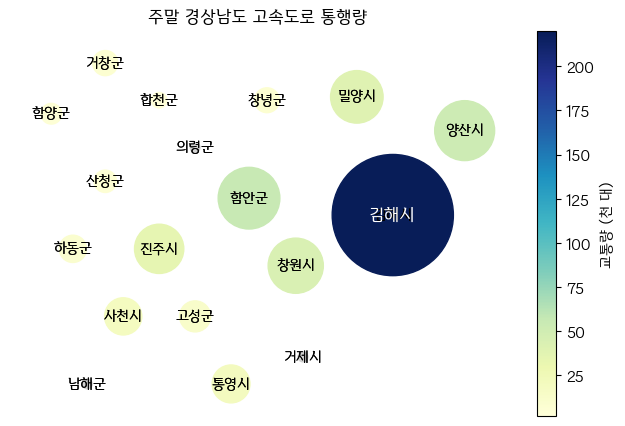

In [40]:
# color nodes according to their total traffic with matplotlib cmap
import matplotlib as mpl
fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.YlGnBu
G = nx.Graph()
G.add_nodes_from(list(gyeongnamTraff.index))
missingNode = ['의령군','남해군','거제시']
G.add_nodes_from(missingNode)
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(225,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(575,525),'창원시':(490,275)
      ,'함안군':(425,375),'양산시':(725,475),'김해시':(625,350)}
pos.update({'의령군':(350,450),'남해군':(200,100),'거제시':(500,140)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=list(gyeongnamTraff.index), font_size=10, node_size=gyeongnamTraff.values/25, node_color=gyeongnamTraff.values/1000, cmap=cmap, font_family='Binggrae?')
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*50, node_color='lightgray', font_family='Binggrae?')
# add color bar
norm = mpl.colors.Normalize(vmin=2, vmax=220)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='교통량 (천 대)')
# Title/legend
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.77,
    0.51,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('주말 경상남도 고속도로 통행량')
plt.margins(0.1,0.1)
plt.show()

In [41]:
fig.savefig('주말경남고속도로통행량.png')

In [26]:
# difference btw weekdays and weekend
# import weekday data
compTraffic = pd.read_csv('gWeekdayTotalTraffic.csv')
compTraffic

,Unnamed: 0,0
0,거창군,5874.00
1,고성군,11494.75
2,사천시,17905.00
3,김해시,219250.25
4,함안군,53199.25
5,밀양시,29331.25
6,양산시,63693.75
7,창녕군,8052.00
8,산청군,4140.25
9,창원시,39609.75


In [27]:
compTraffic = compTraffic.rename(columns={'Unnamed: 0':'name','0':'weekdayTraffic'})
compTraffic['weekendTraffic'] = gyeongnamTraff.values
compTraffic

,name,weekdayTraffic,weekendTraffic
0,거창군,5874.00,8182.25
1,고성군,11494.75,12473.75
2,사천시,17905.00,17926.50
3,김해시,219250.25,190376.50
4,함안군,53199.25,49329.50
5,밀양시,29331.25,35764.25
6,양산시,63693.75,46568.75
7,창녕군,8052.00,8016.50
8,산청군,4140.25,6483.75
9,창원시,39609.75,39470.00


In [28]:
compTraffic['trafficDiff'] = compTraffic['weekdayTraffic']-compTraffic['weekendTraffic']
compTraffic

,name,weekdayTraffic,weekendTraffic,trafficDiff
0,거창군,5874.00,8182.25,-2308.25
1,고성군,11494.75,12473.75,-979.00
2,사천시,17905.00,17926.50,-21.50
3,김해시,219250.25,190376.50,28873.75
4,함안군,53199.25,49329.50,3869.75
5,밀양시,29331.25,35764.25,-6433.00
6,양산시,63693.75,46568.75,17125.00
7,창녕군,8052.00,8016.50,35.50
8,산청군,4140.25,6483.75,-2343.50
9,창원시,39609.75,39470.00,139.75


In [29]:
compTraffic['trafficDiff'] = compTraffic['trafficDiff'].apply(lambda x:int(x))

In [30]:
compTraffic

,name,weekdayTraffic,weekendTraffic,trafficDiff
0,거창군,5874.00,8182.25,-2308
1,고성군,11494.75,12473.75,-979
2,사천시,17905.00,17926.50,-21
3,김해시,219250.25,190376.50,28873
4,함안군,53199.25,49329.50,3869
5,밀양시,29331.25,35764.25,-6433
6,양산시,63693.75,46568.75,17125
7,창녕군,8052.00,8016.50,35
8,산청군,4140.25,6483.75,-2343
9,창원시,39609.75,39470.00,139


In [31]:
compTraffic['name'].values

array(['거창군', '고성군', '사천시', '김해시', '함안군', '밀양시', '양산시', '창녕군', '산청군',
       '창원시', '진주시', '통영시', '함양군', '하동군', '합천군'], dtype=object)

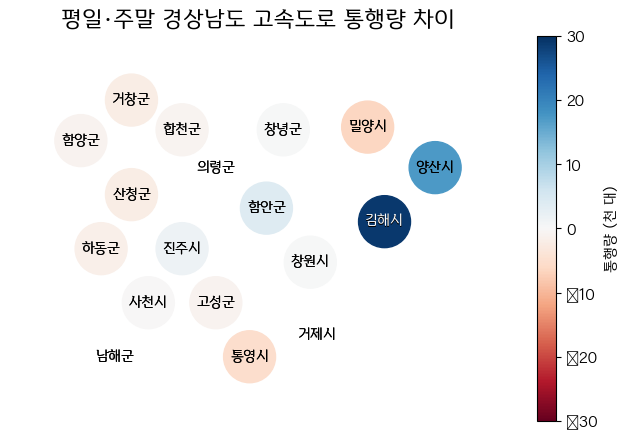

In [40]:
# to network
# draw nodes only
# their size reflects traffic difference between weekdays and weekend
fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.RdBu

# network
G = nx.Graph()
G.add_nodes_from(compTraffic['name'].values)
missingNode = ['의령군','남해군','거제시']
G.add_nodes_from(missingNode)
# reflect real location
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(225,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(575,525),'창원시':(490,275)
      ,'함안군':(425,375),'양산시':(675,450),'김해시':(600,350)}
pos.update({'의령군':(350,450),'남해군':(200,100),'거제시':(500,140)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=compTraffic['name'].values, font_size=10, node_size=1400, node_color=compTraffic['trafficDiff'].values/1000, cmap=cmapTraffic, font_family='Binggrae?', vmin=-30, vmax=30)
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*10, node_color='lightgray', font_family='Binggrae?')
# add color bars
norm = mpl.colors.Normalize(vmin=-30, vmax=30)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='통행량 (천 대)')

# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 10, "fontweight": "extra bold"}
ax.text(
    0.755,
    0.51,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.title('평일·주말 경상남도 고속도로 통행량 차이', fontsize=16)
plt.margins(0.2,0.25)
plt.show() ####### what's wrong?

In [41]:
fig.savefig('평일주말경상남도통행량차이균일크기.png')

C:\Users\syj43\AppData\Local\Temp\ipykernel_20380\2678891163.py:1: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Binggrae?.
  fig.savefig('평일주말경상남도통행량차이균일크기.png')


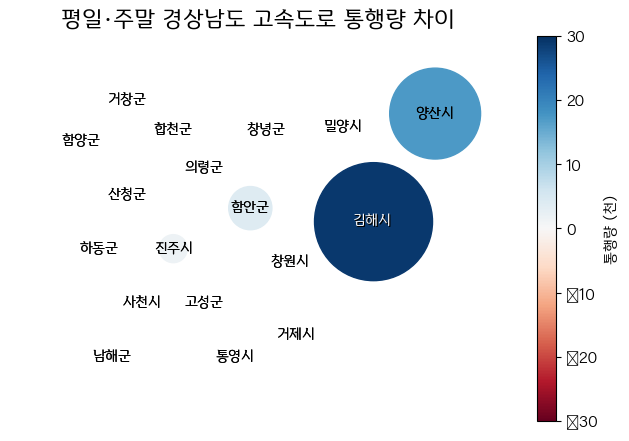

In [105]:
# to network
# draw nodes only
# their size reflects traffic difference between weekdays and weekend
fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.RdBu

# network
G = nx.Graph()
G.add_nodes_from(compTraffic['name'].values)
missingNode = ['의령군','남해군','거제시']
G.add_nodes_from(missingNode)
# reflect real location
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(225,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(575,525),'창원시':(490,275)
      ,'함안군':(425,375),'양산시':(725,550),'김해시':(625,350)}
pos.update({'의령군':(350,450),'남해군':(200,100),'거제시':(500,140)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=compTraffic['name'].values, font_size=10, node_size=compTraffic['trafficDiff'].values/4, node_color=compTraffic['trafficDiff'].values/1000, cmap=cmapTraffic, font_family='Binggrae?', vmin=-30, vmax=30)
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*10, node_color='lightgray', font_family='Binggrae?')
# add color bars
norm = mpl.colors.Normalize(vmin=-30, vmax=30)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='통행량 (천)')

# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 10, "fontweight": "extra bold"}
ax.text(
    0.73,
    0.51,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.title('평일·주말 경상남도 고속도로 통행량 차이', fontsize=16)
plt.margins(0.2,0.25)
plt.show()

In [106]:
fig.savefig('평일주말경상남도통행량차이크기비례.png')

C:\Users\syj43\AppData\Local\Temp\ipykernel_24508\2740520072.py:1: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Binggrae?.
  fig.savefig('평일주말경상남도통행량차이크기비례.png')
